In [ ]:
# 2023.5.1
# reconstructed code 

# random init
# poly function

In [ ]:
import os

cuda_device = '2'

os.environ["CUDA_VISIBLE_DEVICES"] = cuda_device
os.environ['CUBLAS_WORKSPACE_CONFIG']=':4096:8'

import torch

import numpy as np

from para_init import parameters, setup_seed
from permutation import permutation_train



In [ ]:
import torch.multiprocessing as mp
num_processes = 10


width_vector = [10, 20, 40]

# generate a 2-dimensional matrix to hold the results in (i,j)
result_matrix = np.zeros((len(width_vector), 10, 2))

i = 0

for width in width_vector:
    
    setup_seed(2022)
    
    shared_params = parameters()
    
    shared_params.width = width
    shared_params.adjust_scale = 0
    
            
    if __name__ == "__main__":
        
        mp.set_start_method('spawn', force=True)
        
        manager = mp.Manager()
        results_queue = manager.Queue()

        mp.spawn(permutation_train, args=(shared_params, results_queue), nprocs=num_processes, join=True)
        

        while not results_queue.empty():
            (idx, (error, error_infty)) = results_queue.get()
            result_matrix[i, idx, :] = [error, error_infty]
    

    i += 1


    

Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!


In [4]:
print(result_matrix)

[[[0.13860595 0.81335056]
  [0.12590423 1.15229487]
  [0.04030224 0.61789715]
  [0.00924091 0.2133989 ]
  [0.00668379 0.15924704]
  [0.0234377  0.53300047]
  [0.12882267 1.11366522]
  [0.04098175 0.48000181]
  [0.01647827 0.26304722]
  [0.06525813 0.36422288]]

 [[0.03367086 0.51095128]
  [0.04374375 0.31631482]
  [0.00888748 0.1931974 ]
  [0.00855567 0.19530576]
  [0.00281503 0.09585297]
  [0.00389585 0.17091721]
  [0.13763271 0.78314555]
  [0.01301911 0.22341311]
  [0.02863695 0.25690699]
  [0.00340445 0.11727768]]

 [[0.00811871 0.20730102]
  [0.00481149 0.26910388]
  [0.12814355 1.04012191]
  [0.01965977 0.31824112]
  [0.00700672 0.13515738]
  [0.00635813 0.1529454 ]
  [0.00648215 0.237984  ]
  [0.00453018 0.14689904]
  [0.0015872  0.08928275]
  [0.00174182 0.12152302]]]


(3, 10, 2)
0.4709932913200255
<class 'numpy.ndarray'>
0.0
[0.03768715 0.01358803 0.00716367]
[0.47099329 0.23558895 0.20704898]
y_min: [0.00668379 0.00281503 0.0015872 ]
y_max: [0.13860595 0.13763271 0.12814355]
[[0.03100336 0.010773   0.00557647]
 [0.1009188  0.12404468 0.12097988]]


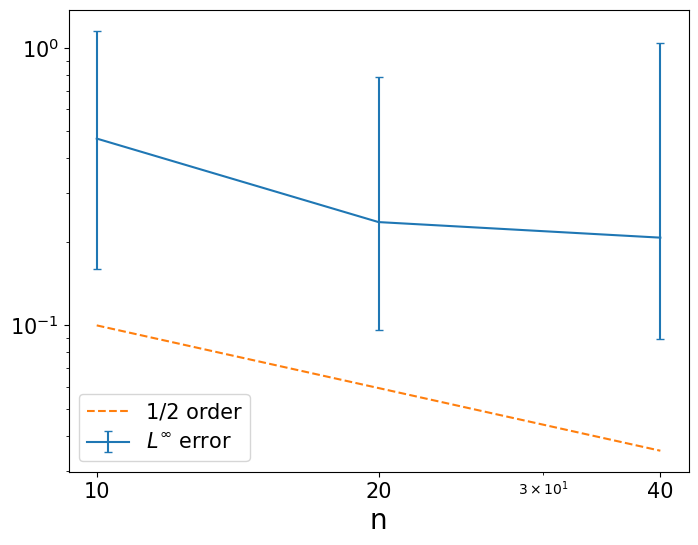

In [ ]:
from statistics import geometric_mean
import matplotlib.pyplot as plt

x = width_vector

print(np.shape(result_matrix))

print(geometric_mean(result_matrix[0,:,1]))


mean = np.zeros(int(len(x)))
mean_inf = np.zeros(int(len(x)))

print(type(mean))

print(mean[0])

for i in range(len(x)):
    mean[i] = geometric_mean(result_matrix[i,:,0])
    mean_inf[i] = geometric_mean(result_matrix[i,:,1])


print(mean)
print(mean_inf)


y_max = np.max(result_matrix[:,:,0], axis = 1)
y_min = np.min(result_matrix[:,:,0], axis = 1)

y_min_inf = np.min(result_matrix[:,:,1], axis = 1)
y_max_inf = np.max(result_matrix[:,:,1], axis = 1)

yerr = np.abs(np.vstack((y_min, y_max)) - mean)

print('y_min: '+str(y_min))
print('y_max: '+str(y_max))
print(yerr)

yerr2 = np.abs(np.vstack((y_min_inf, y_max_inf)) - mean_inf)

start_point = 1E-1

x_ref = [x[0], x[-1]]
y_ref = [start_point, start_point/np.sqrt(np.power(2,len(x)))]



ax = plt.figure(figsize=(8, 6))
plt.errorbar(x, mean_inf, yerr=yerr2, capsize = 3, label='$L^\infty$ error')
plt.plot(x_ref, y_ref, linestyle='--', label='1/2 order')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('n', size=20)
plt.legend(fontsize=15)
plt.xticks(x, x, fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('plot.pdf', bbox_inches='tight')
plt.show()